In [1]:
import galprime as gp

from galprime.plotting import pyplot_style, lavender_cmap
pyplot_style()

import numpy as np

from astropy.table import Table

from matplotlib import pyplot as plt
from matplotlib.colors import TABLEAU_COLORS

config = gp.read_config_file("../notebooks/myconfig.gprime")

In [2]:
cat = Table.read(f"{config['FILE_DIR']}{config['FILES']['CATALOGUE']}")



binlist = gp.bin_catalogue(cat, bin_params={"sfProb": np.array([0., 0.3, 0.7, 1.])}, params=config["KEYS"])

b_q, b_med, b_sf = binlist.bins


{'sfProb': (0.0, 0.3)}
{'sfProb': (0.7, 1.0)}


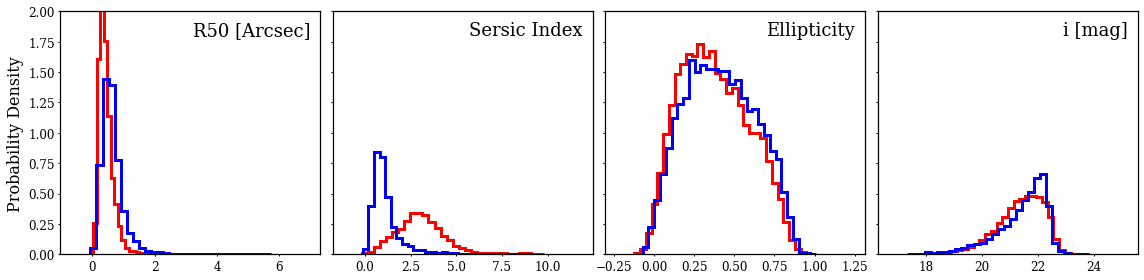

In [ ]:
fig, ax = plt.subplots(1, 4, facecolor="white", figsize=(16, 4), sharey=True)

labels = ["R50 [Arcsec]", "Sersic Index", "Ellipticity", "i [mag]"]

colors = ["red", "blue"]

for b_i, b in enumerate([b_q, b_sf]):
    kdes = b.gen_all_kdes(keys=["REFF", "N", "ELLIP", "MAG"])
    for i, key in enumerate(kdes.keys()):
        kde = kdes[key].resample(10000)[0]
        
        ax[i].hist(kde, bins=30, histtype="step", color=colors[b_i], density=True, lw=3)
        ax[i].set_ylim(0, 2)

for i in range(len(ax)):
    xmin, xmax = ax[i].get_xlim()
    ymin, ymax = ax[i].get_ylim()
    dx, dy = xmax - xmin, ymax - ymin

    ax[i].set_xlim(xmin - 0.1*dx, xmax + 0.2*dx)

    ax[i].text(xmax + 0.15*dx, ymin + 0.9*dy, labels[i], fontsize=18, ha='right')
    
ax[0].set_ylabel( "Probability Density", fontsize=16)

plt.tight_layout()
plt.savefig("plots/1-PDFPlot.pdf", dpi=200)

In [7]:
gp.plotting.KDEPlot.plot_all_kdes(config, cat=cat, indices=[], color="blue", reverse_y=True)

In [8]:
binlist = gp.bin_catalogue(cat, bin_params=config["BINS"], params=config["KEYS"]) 

b = binlist.get_bin_from_indices([0, 1])

print(b.bin_indices)

[0, 1, 0]


In [6]:
test_indices = np.array([0, 1, 1])

check_indices = np.array([0, 1, 1])

good = np.all(test_indices[:len(check_indices)] == check_indices)

print(good)

True
